In [2]:
import pandas_datareader as pdr


In [3]:
key='0c4058b73429dd8abd60a5bec393c61123f4abf4'
df=pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\HP\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [4]:
df.to_csv('AAPL.csv')
import pandas as pd


In [5]:
df=pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-10-25 00:00:00+00:00,118.25,118.36,117.31,117.95,48128970,27.719903,27.745689,27.499550,27.649577,192515880,0.0,1.0
1,AAPL,2016-10-26 00:00:00+00:00,115.59,115.70,113.31,114.31,66134219,27.096351,27.122137,26.561879,26.796297,264536876,0.0,1.0
2,AAPL,2016-10-27 00:00:00+00:00,114.48,115.86,114.10,115.39,34562045,26.836148,27.159644,26.747069,27.049468,138248180,0.0,1.0
3,AAPL,2016-10-28 00:00:00+00:00,113.72,115.21,113.45,113.87,37861662,26.657990,27.007273,26.594697,26.693153,151446648,0.0,1.0
4,AAPL,2016-10-31 00:00:00+00:00,113.54,114.23,113.20,113.65,26419398,26.615795,26.777543,26.536093,26.641581,105677592,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-10-18 00:00:00+00:00,146.55,146.8400,143.16,143.445,85589175,146.55,146.8400,143.16,143.445,85589175,0.0,1.0
1254,AAPL,2021-10-19 00:00:00+00:00,148.76,149.1700,146.55,147.010,76378894,148.76,149.1700,146.55,147.010,76378894,0.0,1.0
1255,AAPL,2021-10-20 00:00:00+00:00,149.26,149.7539,148.12,148.700,58418788,149.26,149.7539,148.12,148.700,58418788,0.0,1.0
1256,AAPL,2021-10-21 00:00:00+00:00,149.48,149.6400,147.87,148.810,61420990,149.48,149.6400,147.87,148.810,61420990,0.0,1.0
1257,AAPL,2021-10-22 00:00:00+00:00,148.69,150.1800,148.64,149.690,58883443,148.69,150.1800,148.64,149.690,58883443,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df1.shape

(1258,)

In [10]:
df1

0       118.25
1       115.59
2       114.48
3       113.72
4       113.54
         ...  
1253    146.55
1254    148.76
1255    149.26
1256    149.48
1257    148.69
Name: close, Length: 1258, dtype: float64

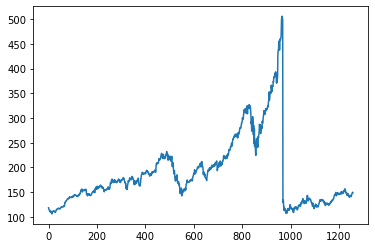

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
import numpy as np


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
df1

array([[0.03132025],
       [0.02467656],
       [0.02190419],
       ...,
       [0.10877167],
       [0.10932114],
       [0.10734802]])

In [16]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

In [18]:
time_step=100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [19]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [22]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 14s 421ms/step - loss: 0.0147 - val_loss: 0.0287
Epoch 2/100
12/12 [==============================] - 4s 299ms/step - loss: 0.0033 - val_loss: 0.0246
Epoch 3/100
12/12 [==============================] - 3s 283ms/step - loss: 0.0013 - val_loss: 0.0211
Epoch 4/100
12/12 [==============================] - 3s 277ms/step - loss: 6.3047e-04 - val_loss: 0.0305
Epoch 5/100
12/12 [==============================] - 4s 298ms/step - loss: 5.1720e-04 - val_loss: 0.0269
Epoch 6/100
12/12 [==============================] - 3s 235ms/step - loss: 4.7654e-04 - val_loss: 0.0242
Epoch 7/100
12/12 [==============================] - 3s 219ms/step - loss: 4.7027e-04 - val_loss: 0.0253
Epoch 8/100
12/12 [==============================] - 3s 231ms/step - loss: 4.6535e-04 - val_loss: 0.0272
Epoch 9/100
12/12 [==============================] - 3s 225ms/step - loss: 4.3174e-04 - val_loss: 0.0287
Epoch 10/100
12/12 [==============================] - 3s 232ms/ste

12/12 [==============================] - 3s 252ms/step - loss: 1.7518e-04 - val_loss: 0.0090
Epoch 79/100
12/12 [==============================] - 3s 276ms/step - loss: 1.7293e-04 - val_loss: 0.0090
Epoch 80/100
12/12 [==============================] - 3s 284ms/step - loss: 1.7676e-04 - val_loss: 0.0087
Epoch 81/100
12/12 [==============================] - 3s 278ms/step - loss: 1.8652e-04 - val_loss: 0.0076
Epoch 82/100
12/12 [==============================] - 2s 194ms/step - loss: 2.1164e-04 - val_loss: 0.0100
Epoch 83/100
12/12 [==============================] - 2s 202ms/step - loss: 1.8603e-04 - val_loss: 0.0085
Epoch 84/100
12/12 [==============================] - 3s 285ms/step - loss: 1.7174e-04 - val_loss: 0.0080
Epoch 85/100
12/12 [==============================] - 3s 285ms/step - loss: 1.7311e-04 - val_loss: 0.0089
Epoch 86/100
12/12 [==============================] - 3s 290ms/step - loss: 1.7745e-04 - val_loss: 0.0077
Epoch 87/100
12/12 [==============================] - 3s 23

In [23]:
import tensorflow as tf

In [24]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))
math.sqrt(mean_squared_error(y_test, test_predict))

206.43994305063688

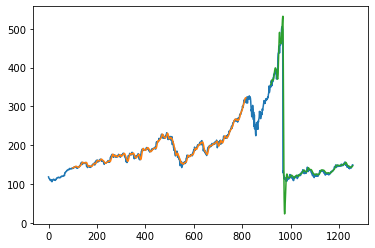

In [26]:
look_back=100
trainPredictplot=numpy.empty_like(df1)
trainPredictplot[:,:]=np.nan
trainPredictplot[look_back:len(train_predict)+look_back,:]=train_predict
testPredictplot=numpy.empty_like(df1)
testPredictplot[:,:]=numpy.nan
testPredictplot[len(train_predict)+(look_back*2)+1:len(df1)-1, :]=test_predict
#plotting
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictplot)
plt.plot(testPredictplot)
plt.show()

In [34]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
#mainloop for prediction
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(-1,1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print temp_input
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.10766802]
101
1 day input [0.05040212 0.05042709 0.0525251  0.05349918 0.0509516  0.05404865
 0.06186623 0.05976822 0.06104201 0.06513812 0.06181627 0.06641191
 0.07060792 0.06990859 0.06918427 0.06843499 0.07260602 0.07647735
 0.07805085 0.07882512 0.08554373 0.09068885 0.0970578  0.09373595
 0.09840651 0.09688296 0.09973026 0.10849693 0.10682352 0.10160348
 0.09176283 0.10100405 0.09913083 0.1026275  0.10702333 0.10809731
 0.10255258 0.09808182 0.09973026 0.10027973 0.09943054 0.10402618
 0.10300215 0.10327689 0.10097907 0.10085419 0.09963035 0.10027973
 0.10784754 0.10837205 0.11341725 0.11109446 0.10152855 0.10237774
 0.10609921 0.1098956  0.10967081 0.1065238  0.10447575 0.10712323
 0.11841251 0.11519057 0.11688896 0.11973625 0.12135971 0.12732904
 0.12338279 0.12078525 0.10804736 0.10949598 0.10592437 0.10819721
 0.10759778 0.10077926 0.09298666 0.0942105  0.10025476 0.10270243
 0.10292722 0.0990559  0.09041411 0.09271192 0.08939008 0.09226235
 0.08349568 0.088416   0.09063889

8 day output [[0.11609822]]
9 day input [0.06104201 0.06513812 0.06181627 0.06641191 0.07060792 0.06990859
 0.06918427 0.06843499 0.07260602 0.07647735 0.07805085 0.07882512
 0.08554373 0.09068885 0.0970578  0.09373595 0.09840651 0.09688296
 0.09973026 0.10849693 0.10682352 0.10160348 0.09176283 0.10100405
 0.09913083 0.1026275  0.10702333 0.10809731 0.10255258 0.09808182
 0.09973026 0.10027973 0.09943054 0.10402618 0.10300215 0.10327689
 0.10097907 0.10085419 0.09963035 0.10027973 0.10784754 0.10837205
 0.11341725 0.11109446 0.10152855 0.10237774 0.10609921 0.1098956
 0.10967081 0.1065238  0.10447575 0.10712323 0.11841251 0.11519057
 0.11688896 0.11973625 0.12135971 0.12732904 0.12338279 0.12078525
 0.10804736 0.10949598 0.10592437 0.10819721 0.10759778 0.10077926
 0.09298666 0.0942105  0.10025476 0.10270243 0.10292722 0.0990559
 0.09041411 0.09271192 0.08939008 0.09226235 0.08349568 0.088416
 0.09063889 0.09386083 0.09288676 0.09266197 0.08941506 0.08791648
 0.09503472 0.09773215 0.1

 0.1193468  0.11999954 0.12065264 0.12130561]
17 day output [[0.12195782]]
18 day input [0.07647735 0.07805085 0.07882512 0.08554373 0.09068885 0.0970578
 0.09373595 0.09840651 0.09688296 0.09973026 0.10849693 0.10682352
 0.10160348 0.09176283 0.10100405 0.09913083 0.1026275  0.10702333
 0.10809731 0.10255258 0.09808182 0.09973026 0.10027973 0.09943054
 0.10402618 0.10300215 0.10327689 0.10097907 0.10085419 0.09963035
 0.10027973 0.10784754 0.10837205 0.11341725 0.11109446 0.10152855
 0.10237774 0.10609921 0.1098956  0.10967081 0.1065238  0.10447575
 0.10712323 0.11841251 0.11519057 0.11688896 0.11973625 0.12135971
 0.12732904 0.12338279 0.12078525 0.10804736 0.10949598 0.10592437
 0.10819721 0.10759778 0.10077926 0.09298666 0.0942105  0.10025476
 0.10270243 0.10292722 0.0990559  0.09041411 0.09271192 0.08939008
 0.09226235 0.08349568 0.088416   0.09063889 0.09386083 0.09288676
 0.09266197 0.08941506 0.08791648 0.09503472 0.09773215 0.1020031
 0.10752285 0.10877167 0.10932114 0.1073480

 0.12579998 0.1264206  0.12703416 0.12764044]
27 day output [[0.1282394]]
28 day input [0.10849693 0.10682352 0.10160348 0.09176283 0.10100405 0.09913083
 0.1026275  0.10702333 0.10809731 0.10255258 0.09808182 0.09973026
 0.10027973 0.09943054 0.10402618 0.10300215 0.10327689 0.10097907
 0.10085419 0.09963035 0.10027973 0.10784754 0.10837205 0.11341725
 0.11109446 0.10152855 0.10237774 0.10609921 0.1098956  0.10967081
 0.1065238  0.10447575 0.10712323 0.11841251 0.11519057 0.11688896
 0.11973625 0.12135971 0.12732904 0.12338279 0.12078525 0.10804736
 0.10949598 0.10592437 0.10819721 0.10759778 0.10077926 0.09298666
 0.0942105  0.10025476 0.10270243 0.10292722 0.0990559  0.09041411
 0.09271192 0.08939008 0.09226235 0.08349568 0.088416   0.09063889
 0.09386083 0.09288676 0.09266197 0.08941506 0.08791648 0.09503472
 0.09773215 0.1020031  0.10752285 0.10877167 0.10932114 0.10734802
 0.10766802 0.10982946 0.11140418 0.11254475 0.11341575 0.11414412
 0.11480992 0.11545534 0.11609822 0.116743

In [37]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [38]:
import matplotlib.pyplot as plt


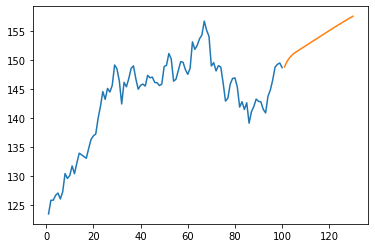

In [39]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

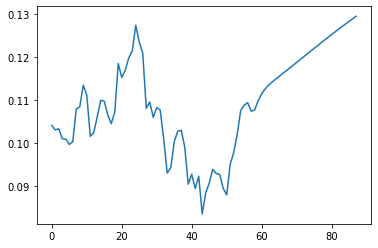

In [40]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

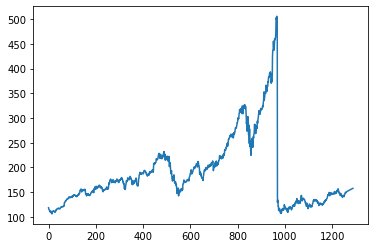

In [41]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)